In [1]:
import pandas as pd
import numpy as np
from pydataset import data
from sklearn.linear_model import LinearRegression
import math
import stat
import seaborn as sns

#train validate, split
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

# metrics and confusion
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#model classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from math import sqrt

from sklearn.metrics import explained_variance_score



In [2]:
tips_df = data('tips')
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
tips_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


### 2.) Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill

In [4]:
#make baseline prediction 
tips_df['yhat_baseline'] = tips_df['tip'].mean()

# generate parameters, i.e. create model
reg_model = LinearRegression().fit(tips_df[['total_bill']], tips_df['tip'])

# compute predictions and add to original dataframe
tips_df['yhat'] = reg_model.predict(tips_df[['total_bill']])

### 3.) Plot the residuals for the linear regression model that you made.

In [5]:
#residual is y prediciton - y original (target)
tips_df['residual'] = tips_df['yhat'] - tips_df['tip']
#residual baseline is baseline_prediction - baseline actual.
tips_df['residual_baseline']= tips_df['tip'] - tips_df['yhat_baseline'] 

In [6]:
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat_baseline,yhat,residual,residual_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,-0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,-0.107178,0.611721


<AxesSubplot:ylabel='Frequency'>

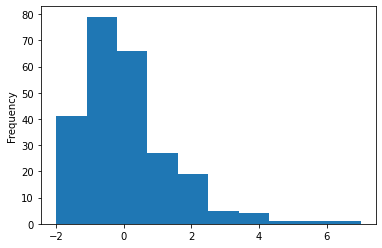

In [7]:
tips_df.residual_baseline.plot.hist()

<AxesSubplot:ylabel='Frequency'>

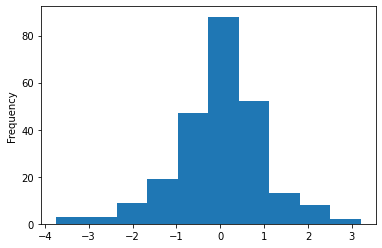

In [8]:
tips_df.residual.plot.hist()

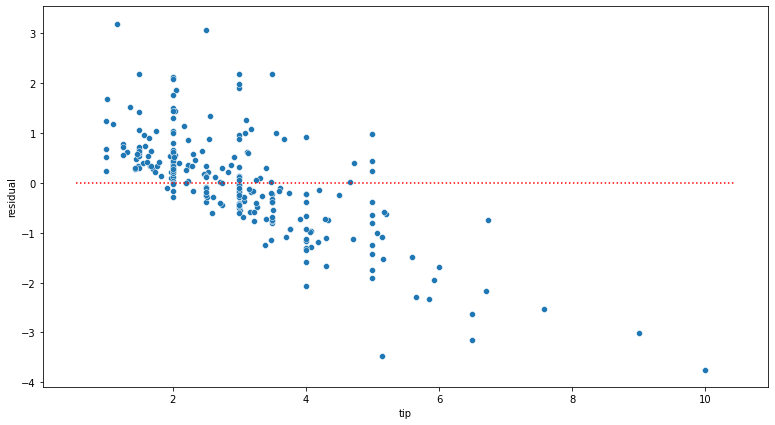

In [9]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.scatterplot(data = tips_df, x='tip', y= 'residual')
ax.hlines(0, *ax.get_xlim(), ls=':', color='red')

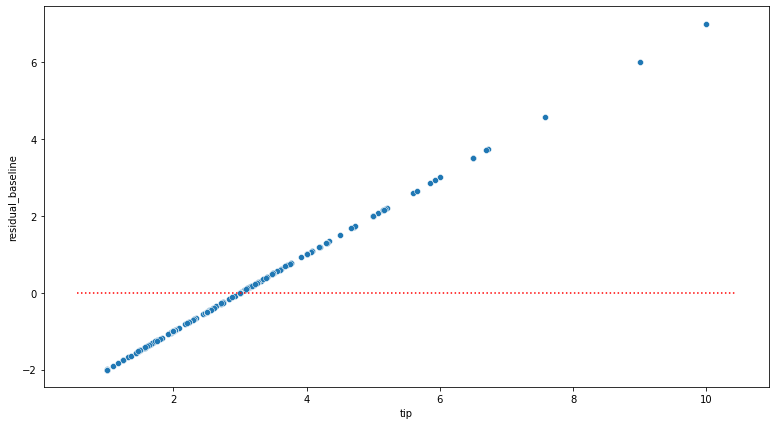

In [10]:
fig, ax = plt.subplots(figsize=(13, 7))
sns.scatterplot(data = tips_df, x='tip', y= 'residual_baseline')
ax.hlines(0, *ax.get_xlim(), ls=':', color='red')

### 4.) Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.
#### number 4 and 5 combined on number 5

### 5.) Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [11]:
# calculating SSE, TSE, MSE, RMSE, ESE

In [12]:
# SSE
# square each residual value
tips_df['residual^2'] = tips_df.residual ** 2

tips_df['residual_baseline^2'] = tips_df.residual_baseline ** 2

In [13]:
# SSE
SSE = sum(tips_df['residual^2'])
SSE_baseline = sum(tips_df['residual_baseline^2'])

print("SSE = ", SSE)
print("SSE - baseline = ", SSE_baseline)

SSE =  252.78874385077597
SSE - baseline =  465.21247704918085


In [14]:
#MSE
MSE = SSE/len(tips_df)
MSE_baseline = SSE_baseline/len(tips_df)

print("MSE = ", MSE)
print("MSE baseline = ", MSE_baseline)

MSE =  1.0360194420113769
MSE baseline =  1.9066085124966428


In [15]:
#RMSE
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline = sqrt(MSE_baseline)

print("RMSE = ", RMSE)
print("RMSE baseline = ", RMSE_baseline)

RMSE =  1.0178504025697377
RMSE baseline =  1.3807999538298958


In [16]:
from sklearn.metrics import mean_squared_error

SSE2 = mean_squared_error(tips_df.tip, tips_df.yhat)*len(tips_df)
SSE2_baseline = mean_squared_error(tips_df.tip, tips_df.yhat_baseline)*len(tips_df)

print("SSE manual == SSE sklearn: ", SSE == SSE2) 
print("SSE manual - baseline == SSE sklearn - baseline: ", SSE_baseline == SSE2)

SSE manual == SSE sklearn:  False
SSE manual - baseline == SSE sklearn - baseline:  False


In [17]:
MSE2 = mean_squared_error(tips_df.tip, tips_df.yhat)

MSE2_baseline = mean_squared_error(tips_df.tip, tips_df.yhat_baseline)


print("MSE manual == MSE sklearn: ", MSE == MSE2) 
print("MSE manual - baseline == MSE sklearn - baseline: ", MSE_baseline == MSE2_baseline) 

MSE manual == MSE sklearn:  False
MSE manual - baseline == MSE sklearn - baseline:  False


In [18]:
RMSE2 = sqrt(mean_squared_error(tips_df.tip, tips_df.yhat))
RMSE2_baseline = sqrt(mean_squared_error(tips_df.tip, tips_df.yhat_baseline))

print("RMSE manual == RMSE skearn: ", RMSE == RMSE2) 
print("RMSE manual - baseline == RMSE skearn - baseline: ", RMSE_baseline == RMSE2_baseline) 

RMSE manual == RMSE skearn:  True
RMSE manual - baseline == RMSE skearn - baseline:  False


### 6.) Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

---------Model---------------
  metric  model_error
0    SSE   252.788744
1    MSE     1.036019
2   RMSE     1.017850
3    ESS   212.423733
4    TSS   465.212477
5     R2     0.456617

-----------------------------
Percent of variance in y explained by x =  45.7 %



### 7.) What is the amount of variance explained in your model?

##### the amount of variance is 45.7 %

### 8.) Is your model better than the baseline model?
rmse value indicates model is better.

In [ ]:
#rmse: how far off the typical prediction is; same units as the target; smaller is better
#R2: variance in y explained by X; closer to 1 is better

### 9.) Create a file named evaluate.py that contains the following functions.
- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
    - sum of squared errors (SSE)
    - explained sum of squares (ESS)
    - total sum of squares (TSS)
    - mean squared error (MSE)
    - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [25]:
def plot_residuals(df,feature, y):
    #residual is y prediciton - y original (target)
    reg_model = LinearRegression().fit(df[[feature]], df[y])
    # compute predictions and add to original dataframe
    df['yhat'] = reg_model.predict(df[[feature]])
    df['yhat_baseline'] = df[y].mean()
    df['residual'] = df.yhat - df[y]
    #residual baseline is baseline_prediction - baseline actual.
    df['residual_baseline'] = df['yhat_baseline'] - df[y]
    df.residual.plot.hist()
    
    plt.show()
    df.residual_baseline.plot.hist()
    plt.show
    

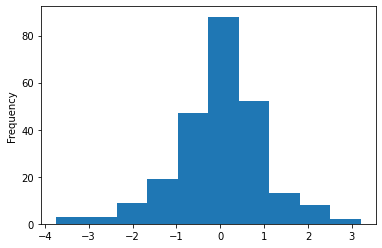

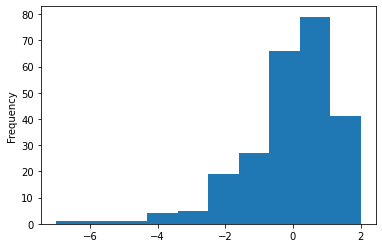

In [26]:
plot_residuals(tips_df, 'total_bill', 'tip')

In [38]:
def residual_errors(df,feature, target):
    #make baseline prediction 
    df['yhat_baseline'] = df[target].mean()
    # generate parameters, i.e. create model
    reg_model = LinearRegression().fit(df[[feature]], df[target])
    # compute predictions and add to original dataframe
    df['yhat'] = reg_model.predict(df[[feature]])
    #Calculating residual and residual baseline
    df['residual'] = df['yhat'] - df[target]
    df['residual_baseline'] = df['yhat_baseline'] - df[target]
    #Residual and baseline residual squared
    df['residual^2'] = df.residual ** 2
    df['residual_baseline^2'] = df.residual_baseline ** 2
    # calculating SSE and SSE baseline
    #SUM SQUARED ERROR
    SSE = mean_squared_error(df[target], df.yhat)*len(df)
    SSE_baseline = mean_squared_error(df[target], df.yhat_baseline)*len(df)
    #MEAN SQUARED ERROR
    MSE = mean_squared_error(df[target], df.yhat)
    MSE_baseline = mean_squared_error(df[target], df.yhat_baseline)
    #Root Mean Squared ERROR
    RMSE = sqrt(mean_squared_error(df[target], df.yhat))
    RMSE_baseline = sqrt(mean_squared_error(df[target], df.yhat_baseline))
    #######
    ESS = sum((df.yhat - df[target].mean())**2)
    ESS_baseline = sum((df.yhat_baseline - df[target].mean())**2)
    #######
    ###########
    TSS = ESS + SSE
    TSS_baseline = ESS_baseline + SSE_baseline
    ###########
    R2 = ESS/TSS
    R2_baseline = ESS_baseline / SSE_baseline
    #evaluation of model and baseline
    df_eval = pd.DataFrame(np.array(['SSE','MSE','RMSE','ESS','TSS','R2']), columns=['metric'])
    df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline', 'ESS_baseline','TSS_baseline','R2_baseline']), columns=['metric'])
    df_eval['model_error'] = np.array([SSE, MSE, RMSE, ESS, TSS, R2])

################################################
    
    print('---------Model---------------')
    print(df_eval)
    print("")
    print('-----------------------------')
    print("Percent of variance in y explained by x = ", round(R2*100,1), "%")
    print("")
    

In [39]:
residual_errors(tips_df, 'total_bill', 'tip')

---------Model---------------
  metric  model_error
0    SSE   252.788744
1    MSE     1.036019
2   RMSE     1.017850
3    ESS   212.423733
4    TSS   465.212477
5     R2     0.456617

-----------------------------
Percent of variance in y explained by x =  45.7 %



In [20]:
def baseline_mean_errors(df,feature, target):
    df['yhat_baseline'] = df[target].mean()
    # generate parameters, i.e. create model
    reg_model = LinearRegression().fit(df[[feature]], df[target])
    # compute predictions and add to original dataframe
    df['yhat'] = reg_model.predict(df[[feature]])
    #Calculating residual and residual baseline
    df['residual'] = df.yhat - df[target]
    df['residual_baseline'] = df['yhat_baseline'] - df[target]
    #Residual and baseline residual squared
    df['residual^2'] = df.residual ** 2
    df['residual_baseline^2'] = df.residual_baseline ** 2
    
    
    
    # calculating baseline
    #SUM SQUARED ERROR
    SSE_baseline = mean_squared_error(df[target], df.yhat_baseline)*len(df)
    #MEAN SQUARED ERROR
    MSE_baseline = mean_squared_error(df[target], df.yhat_baseline)
    #Root Mean Squared Eroor
    RMSE_baseline = sqrt(mean_squared_error(df[target], df.yhat_baseline))
    
    #evaluation of model and baseline
    df_baseline_eval = pd.DataFrame(np.array(['SSE_baseline','MSE_baseline','RMSE_baseline']), columns=['metric'])
    df_baseline_eval['model_error'] = np.array([SSE_baseline, MSE_baseline, RMSE_baseline])
    
    print(df_baseline_eval)


In [28]:
baseline_mean_errors(tips_df, 'total_bill', 'tip')

          metric  model_error
0   SSE_baseline   465.212477
1   MSE_baseline     1.906609
2  RMSE_baseline     1.380800


In [17]:
def better_than_baseline(df, feature, target): 
    df['yhat_baseline'] = df[target].mean()
    # generate parameters, i.e. create model
    reg_model = LinearRegression().fit(df[[feature]], tips_df[target])
    # compute predictions and add to original dataframe
    df['yhat'] = reg_model.predict(df[[feature]])
    #Calculating residual and residual baseline
    df['residual'] = df.yhat - df[target]
    df['residual_baseline'] = df['yhat_baseline'] - df[target]
    #Residual and baseline residual squared
    df['residual^2'] = df.residual ** 2
    df['residual_baseline^2'] = df.residual_baseline ** 2
    
    RMSE = sqrt(mean_squared_error(df[target], df.yhat))
    RMSE_baseline = sqrt(mean_squared_error(df[target], df.yhat_baseline))
    #######

    if RMSE > RMSE_baseline:
        print(f'\n Model performs better than baseline, Model:{RMSE:.2f}, Baseline:{RMSE_baseline: .2f}')
    else:
        print(f'\n Model did not perform better than the baseline, Model:{RMSE: .2f}, Baseline:{RMSE_baseline: .2f}')

In [18]:
better_than_baseline(tips_df, 'total_bill', 'tip')


 Model did not perform better than the baseline, Model: 1.02, Baseline: 1.38


### 10.)Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [49]:
mpg_df = data('mpg')

In [50]:
mpg_df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
